# Content Moderation System | NLP | Transformer From Hugging Face | Text PreProcessing | Data Transformation

## Import Necessory Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import matplotlib.pyplot as plt

## Reading CSV file in Pandas Dataframe | Collect Data From Amazon Review

In [ ]:
df= pd.read_csv("data.csv")
df.head()

,text,annotation,polarity
0,One of the best game music soundtracks - for a...,0,Positive
1,Batteries died within a year ...I bought this ...,1,Negative
2,"works fine, but Maha Energy is betterCheck out...",0,Positive
3,Great for the non-audiophileReviewed quite a b...,0,Positive
4,DVD Player crapped out after one yearI also be...,1,Negative


## We have 70000 Datapoints

In [ ]:
df.shape

(70000, 3)

## Having Balance dataset | ( Positive: Negative ) ---> 50 : 50

Text(0.5, 1.0, 'checking Imbalancing in the Dataset')

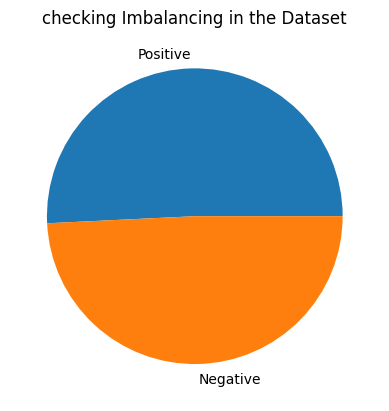

In [ ]:
positive=df['annotation'].value_counts()[0]
negative=df['annotation'].value_counts()[1]
plt.pie([positive,negative],labels=['Positive','Negative'])
plt.title("checking Imbalancing in the Dataset")

## Exploratory Data Analysis | Checking for Null and duplicate values in dataset

In [ ]:
df.isnull().sum()

,0
text,0
annotation,0
polarity,0


In [ ]:
for column in df:
  print(f"{column} : {df[column].unique()}")

text : ["One of the best game music soundtracks - for a game I didn't really playDespite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it."
 'Batteries died within a year ...I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries

## Downloading Bert Tokenizer to tokenize the text

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Tokenize and Preprocess the data

In [ ]:
# Extract the text and annotation columns
text_annotation_df = df[['text', 'annotation']]

# Tokenize and preprocess the data
def preprocess_data(df, max_length=10):
    # Tokenize the text column with padding and truncation
    encoded_inputs = tokenizer(
        df['text'].tolist(),         # List of text inputs
        max_length=max_length,       # Maximum length for padding/truncation
        padding='max_length',        # Pad to the max length specified
        truncation=True,             # Truncate sequences longer than max_length
        return_tensors=None          # Return plain Python lists
    )

    # Add the preprocessed data back into the DataFrame
    df['input_ids'] = encoded_inputs['input_ids']
    df['attention_mask'] = encoded_inputs['attention_mask']

    return df

# Preprocess the dataframe
preprocessed_df = preprocess_data(text_annotation_df)

# Display the preprocessed dataframe
print(preprocessed_df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

                                                    text  annotation  \
0      One of the best game music soundtracks - for a...           0   
1      Batteries died within a year ...I bought this ...           1   
2      works fine, but Maha Energy is betterCheck out...           0   
3      Great for the non-audiophileReviewed quite a b...           0   
4      DVD Player crapped out after one yearI also be...           1   
...                                                  ...         ...   
69995  First of all...let me just say that Britney is...           1   
69996  baby one more time is the only good thing on h...           1   
69997  Not a very good album at all to be honest with...           1   
69998  SlipLooks like this album is already starting ...           1   
69999  UMMMMMMM NOYikes why did I even waste my money...           1   

                                               input_ids  \
0      [101, 2028, 1997, 1996, 2190, 2208, 2189, 2424...   
1      [101, 10

In [ ]:
# Save the preprocessed dataframe to a CSV file
preprocessed_df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
DataFrame=pd.read_csv("preprocessed_data.csv")

In [ ]:
DataFrame.head()

,text,annotation,input_ids,attention_mask
0,One of the best game music soundtracks - for a...,0,"[101, 2028, 1997, 1996, 2190, 2208, 2189, 2424...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
1,Batteries died within a year ...I bought this ...,1,"[101, 10274, 2351, 2306, 1037, 2095, 1012, 101...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2,"works fine, but Maha Energy is betterCheck out...",0,"[101, 2573, 2986, 1010, 2021, 24404, 2943, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
3,Great for the non-audiophileReviewed quite a b...,0,"[101, 2307, 2005, 1996, 2512, 1011, 5746, 2486...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
4,DVD Player crapped out after one yearI also be...,1,"[101, 4966, 2447, 10231, 5669, 2041, 2044, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
